# Initial Data Analysis

In [2]:
# Helper libraries
import warnings

# Scientific and visual libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Local Modules
from youtube_analysis.edautils import get_dataset_info, plot_stem

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Various settings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_colwidth", 40)
pd.set_option("display.precision", 4)
pd.set_option("display.max_columns", None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from youtube_analysis.paths import RAW_DATA_DIR, INTERIM_DATA_DIR

In [4]:
data = pd.read_pickle(RAW_DATA_DIR / "lex_comments.pkl")
corpus = data.copy()
corpus.head(10)

,author,published_at,updated_at,likes,text
0,Lex Fridman,2022-12-29T17:34:04Z,2022-12-29T17:34:04Z,194,Here are the timestamps. Please chec...
1,Steve C,2023-11-10T22:16:58Z,2023-11-10T22:16:58Z,0,😳The Plants are Fake…?
2,Brigid Mary Prain,2023-11-09T09:51:33Z,2023-11-09T09:51:33Z,0,Responding to your pushback on the p...
3,Jack Reacher,2023-11-04T09:30:38Z,2023-11-04T09:30:38Z,0,"<a href=""https://www.youtube.com/wat..."
4,Oskar Gudnason,2023-11-02T21:47:54Z,2023-11-03T12:18:47Z,0,Don´t you forget that the ape comes ...
5,Boggo,2023-11-01T09:06:38Z,2023-11-01T09:06:38Z,0,Does this host not bother to speak c...
6,Imperious,2023-10-31T20:03:41Z,2023-10-31T20:03:41Z,0,"This is dumb, the only answer is God..."
7,Elizabeth,2023-10-30T14:01:05Z,2023-10-30T14:01:05Z,0,Annnd they ...... 😅 Awesomeness!
8,Indie Guvenc,2023-10-30T09:39:49Z,2023-10-30T09:46:12Z,0,"@<a href=""https://www.youtube.com/wa..."
9,Gary Rowe,2023-10-27T06:41:52Z,2023-10-27T06:41:52Z,0,Sorry bro too much do do bird things...


In [5]:
get_dataset_info(corpus)

Dataset dimensions: 2045 rows and 5 columns
-----------------------------------
Attribute set:
['author', 'published_at', 'updated_at', 'likes', 'text']
-----------------------------------
Data types:
author          object
published_at    object
updated_at      object
likes            int64
text            object
dtype: object
-----------------------------------
Cardinality in variables:
likes             57
author          1700
text            2036
published_at    2041
updated_at      2041
dtype: int64
-----------------------------------
Values in variables:
author -> APTERA EVoL-eR Dave Pyne Keely Evans adelina quijano miriam kucera ...
published_at -> 2022-12-29T17:34:04Z 2022-12-29T22:05:53Z 2022-12-30T01:36:52Z 2022-12-31T11:40:43Z 2023-01-01T14:04:36Z ...
updated_at -> 2022-12-29T17:34:04Z 2022-12-29T22:05:53Z 2022-12-30T01:36:52Z 2022-12-31T11:40:43Z 2023-01-01T14:04:36Z ...
likes -> 0 1 2 3 4 ...
text -> Every interview is amazing, but this conversation was on another level.  

In [6]:
## Variable classification

datetime_variables = [
    "published_at",
    "updated_at",
]

nominal_variable = [
    "author",
]

count_variable = [
    "likes",
]

text_variable = [
    "text"
]

In [7]:
## Datetime Data casting
corpus.published_at = pd.to_datetime(corpus.published_at)
corpus.updated_at = pd.to_datetime(corpus.updated_at)

In [8]:
## Text Data casting
corpus.text = corpus.text.astype("string")

In [9]:
corpus.dtypes

author                       object
published_at    datetime64[ns, UTC]
updated_at      datetime64[ns, UTC]
likes                         int64
text                 string[python]
dtype: object

<Axes: >

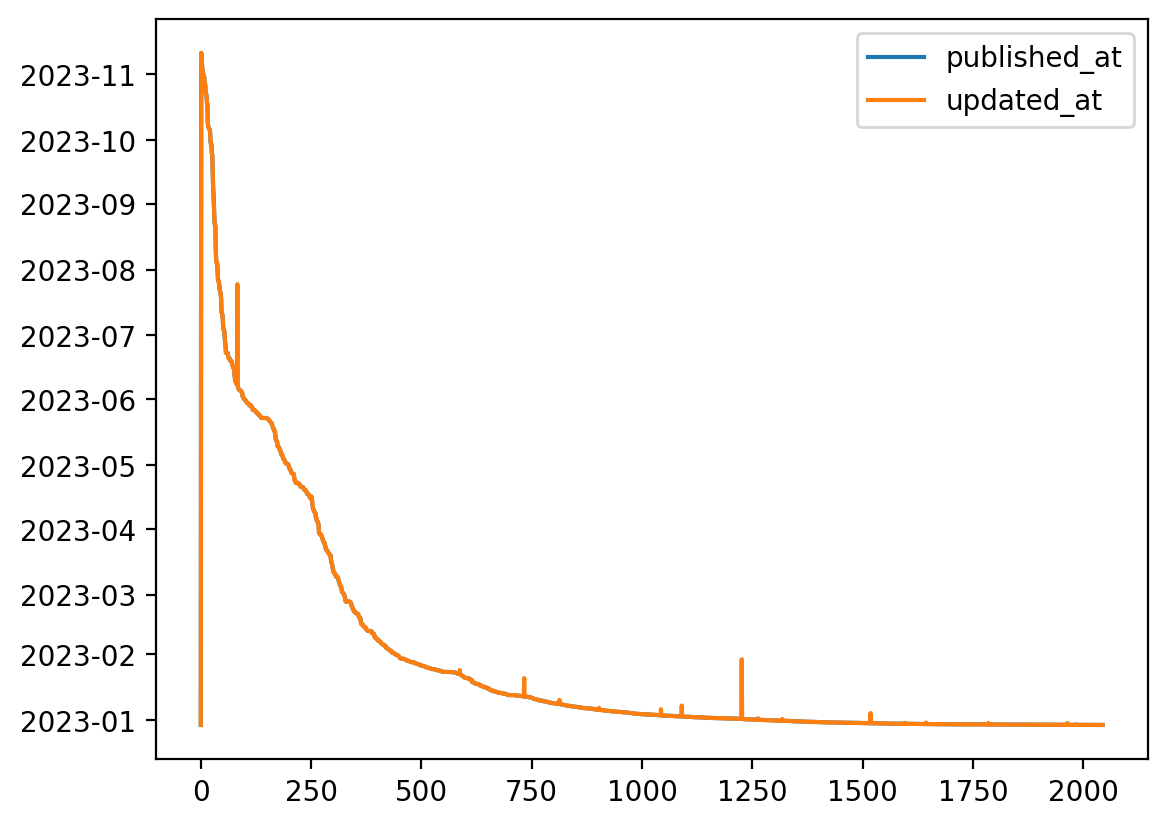

In [10]:
## Check Range values in datetimes variables:
# We know that this video was first published the 29 december 2022
# and is still online.
corpus[datetime_variables].plot()

In [11]:
# As we can see, the number of comments is high at the beginning
# and decrease over time.
# The last comment at this time is 2023-11-10
corpus[datetime_variables].describe()

,published_at,updated_at
count,2045,2045
mean,2023-01-29 05:36:42.256234752+00:00,2023-01-29 06:55:04.801955840+00:00
min,2022-12-29 17:34:04+00:00,2022-12-29 17:34:04+00:00
25%,2022-12-30 11:08:09+00:00,2022-12-30 12:10:44+00:00
50%,2023-01-03 13:20:08+00:00,2023-01-03 14:04:59+00:00
75%,2023-01-25 19:41:15+00:00,2023-01-25 21:58:28+00:00
max,2023-11-10 22:16:58+00:00,2023-11-10 22:16:58+00:00


In [12]:
## Check Range values in like count variable:
corpus[count_variable].describe()

,likes
count,2045.0000
mean,2.8411
std,18.3812
min,0.0000
25%,0.0000
50%,0.0000
75%,1.0000
max,370.0000


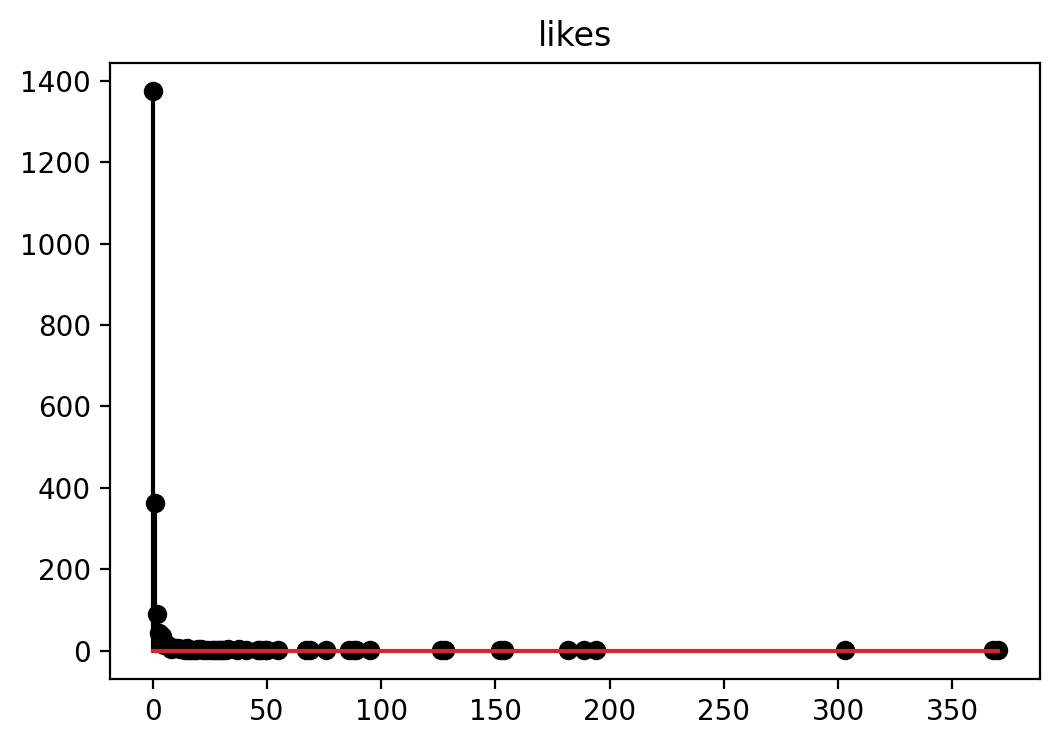

In [14]:
# As usual: viewers with high like count are infrequent 
# and conversly low like count as very common.
plt.figure(figsize=(6, 4))
plot_stem(corpus, "likes")

In [17]:
# Let's check what kind of garbage and inconsistency we have in initial text corpus.
# We will inspect a sample rather than all data:
for i in range(10):
    sample = corpus.sample(n=10, random_state=i)
    for text in sample.text:
        print(text)
        print("---------------------------------------------------------------------------")

This chick is deadass on here method acting, preparing for the next Toho Godzilla movie. Look, I took only a single Botany class and don’t even remember it for shit, but I am questioning this chick a few minutes in as having a grandiose ideas that may appear crazy in a lab on the big screen
---------------------------------------------------------------------------
1:35:50 the worry about responsibility for suffering seems misguided. Most everything that lives continually chooses to go on living—even pandas.
---------------------------------------------------------------------------
great podcast! Tip on the editing... When showing graphics don't move it, keep on the exiting place and when switching to your camera don't display. The last thing you want to do it to move information, graphics around. Who ever is doing the editing, needs some lesson. Now, you could have both on the screen and the graphics on the center, using a mask between both videos to blend them together with the grap

In [18]:
# What we find are:
# capitalization, 
# punctuation, 
# special characters, 
# numbers, 
# urls/html tags, 
# emojis/emoticons, 
# misspelling, 
# foreign characters/words, 
# acronyms,
# and so on.

In [ ]:
corpus.to_pickle(INTERIM_DATA_DIR / "corpus.pkl")